In [30]:
import openmc
import matplotlib.pyplot as plt
import numpy as np

radius = 0.39

with openmc.StatePoint("statepoint.1000.h5") as sp:
    df2 = sp.get_tally(name='zernike').get_pandas_dataframe()


means = df2['mean']
std_devs = df2['std. dev.']

# Filter coefficients that are smaller than their respective standard deviations
filtered_coeffs = [mean if abs(mean) >= std_dev else 0 for mean, std_dev in zip(means, std_devs)]

In [31]:
filtered_coeffs

[2.8233694222870613,
 0.00035752279471910214,
 0.0005334822025895585,
 -0.00030401971484738034,
 -0.03156151242894231,
 0.0005245258170181006,
 0,
 0.0003068188833790125,
 0.0002757574219112761,
 0,
 -0.0002393644483700834,
 -0.0005754260037206507,
 -0.0102891423205458,
 0,
 0.0090944822992807]

Text(0, 0.5, 'Flux')

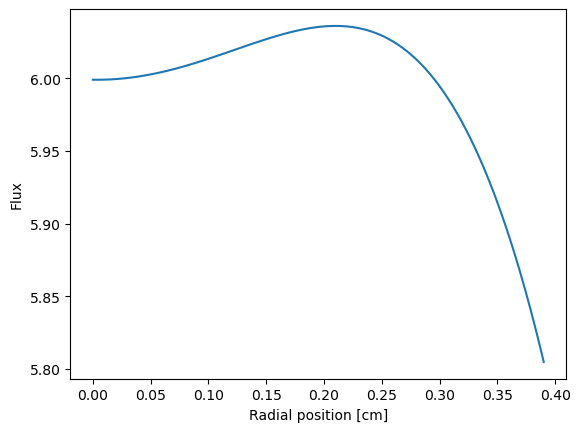

In [32]:
z_n = df2['mean'] 
zz = openmc.Zernike(z_n, radius)
rr = np.linspace(0, radius, 100)
plt.plot(rr, zz(rr, 0.0)) 
plt.xlabel('Radial position [cm]')
plt.ylabel('Flux')

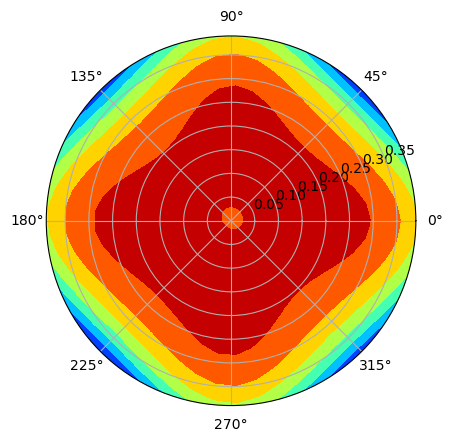

In [33]:
z_n = df2['mean']
zz = openmc.Zernike(filtered_coeffs, radius=radius) 
#
# Using linspace so that the endpoint of 360 is included...
azimuths = np.radians(np.linspace(0, 360, 50))
zeniths = np.linspace(0, radius, 100)
r, theta = np.meshgrid(zeniths, azimuths)
values = zz(zeniths, azimuths)
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, r, values, cmap='jet')
plt.show()